In [1]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec


C:\Users\AB\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
delay_df3.isnull().values.any()

True

In [37]:
delay_df3.isnull().sum()

QUARTER                      0
MONTH                        0
DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
FL_DATE                      0
CARRIER                      0
FL_NUM                       0
Route                        0
ORIGIN                       0
DEST                         0
DEST_CITY                    0
DEST_STATE                   0
CRS_DEP_TIME                 0
DEP_TIME                 44831
DEP_DELAY                47063
DEP_DELAY_NEW            47063
DEP_DEL15                47063
DEP_DELAY_GROUP          47063
DEP_TIME_BLK                 0
WHEELS_OFF               45643
WHEELS_ON                46984
CRS_ARR_TIME                 0
ARR_TIME                 46984
ARR_DELAY                51376
ARR_DELAY_NEW            51376
ARR_DEL15                51376
ARR_DELAY_GROUP          51376
ARR_TIME_BLK                 0
CANCELED                     0
DIVERTED                     0
CRS_ELAPSED_TIME             7
ACTUAL_ELAPSED_TIME      50227
AIR_TIME

In [38]:

print('Dataframe dimensions:', delay_df.shape)
#____________________________________________________________
# gives some infos on columns types and number of null values
tab_info=pd.DataFrame(delay_df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(delay_df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(delay_df.isnull().sum()/delay_df.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
tab_info

Dataframe dimensions: (2000000, 39)


QUARTER  MONTH DAY_OF_MONTH DAY_OF_WEEK FL_DATE CARRIER  \
column type        int64  int64        int64       int64  object  object   
null values (nb)       0      0            0           0       0       0   
null values (%)        0      0            0           0       0       0   

                 FL_NUM  Route  ORIGIN    DEST DEST_CITY DEST_STATE  \
column type       int64  int64  object  object    object     object   
null values (nb)      0      0       0       0         0          0   
null values (%)       0      0       0       0         0          0   

                 CRS_DEP_TIME DEP_TIME DEP_DELAY DEP_DELAY_NEW DEP_DEL15  \
column type             int64  float64   float64       float64   float64   
null values (nb)            0    44831     47063         47063     47063   
null values (%)             0  2.24155   2.35315       2.35315   2.35315   

                 DEP_DELAY_GROUP DEP_TIME_BLK WHEELS_OFF WHEELS_ON  \
column type              float64       object    float64   float64   
null values (nb)           47063            0      45643     46984   
null values (%)          2.35315            0    2.28215    2.3492   

                 CRS_ARR_TIME ARR_TIME ARR_DELAY ARR_DELAY_NEW ARR_DEL15  \
column type             int64  float64   float64       float64   float64   
null values (nb)            0    46984     51376         51376     51376   
null values (%)             0   2.3492    2.5688        2.5688    2.5688   

                 ARR_DELAY_GROUP ARR_TIME_BLK CANCELED DIVERTED  \
column type              float64       object    int64    int64   
null values (nb)           51376            0        0        0   
null values (%)           2.5688            0        0        0   

                 CRS_ELAPSED_TIME ACTUAL_ELAPSED_TIME AIR_TIME DISTANCE  \
column type               float64             float64  float64    int64   
null values (nb)                7               50227    50227        0   
null values (%)           0.00035             2.51135  2.51135        0   

                 CARRIER_DELAY WEATHER_DELAY NAS_DELAY SECURITY_DELAY  \
column type            float64       float64   float64        float64   
null values (nb)       1656513       1656513   1656513        1656513   
null values (%)        82.8256       82.8256   82.8256        82.8256   

                 LATE_AIRCRAFT_DELAY  
column type                  float64  
null values (nb)             1656513  
null values (%)              82.8256

In [ ]:
datetime= delay_df.iloc[:,1:4]
datetime

In [8]:
airports = pd.read_csv("Airports.csv")

In [9]:
import pandas as pd
airports_df=pd.read_csv('Airports.csv')
airports_df

Airport                      City_State State
0       ABE  Allentown/Bethlehem/Easton, PA    PA
1       ABI                     Abilene, TX    TX
2       ABQ                 Albuquerque, NM    NM
3       ABR                    Aberdeen, SD    SD
4       ABY                      Albany, GA    GA
..      ...                             ...   ...
357     WYS            West Yellowstone, MT    MT
358     XNA                Fayetteville, AR    AR
359     YAK                     Yakutat, AK    AK
360     YNG           Youngstown/Warren, OH    OH
361     YUM                        Yuma, AZ    AZ

[362 rows x 3 columns]

In [10]:
routes_df=pd.read_csv('Routes.csv')
routes_df

Route ORIGIN               ORIGIN_City_State  \
0         1    ABE  Allentown/Bethlehem/Easton, PA   
1         2    ABE  Allentown/Bethlehem/Easton, PA   
2         3    ABE  Allentown/Bethlehem/Easton, PA   
3         4    ABE  Allentown/Bethlehem/Easton, PA   
4         5    ABE  Allentown/Bethlehem/Easton, PA   
...     ...    ...                             ...   
6679   6680    YAK                     Yakutat, AK   
6680   6681    YNG           Youngstown/Warren, OH   
6681   6682    YNG           Youngstown/Warren, OH   
6682   6683    YUM                        Yuma, AZ   
6683   6684    YUM                        Yuma, AZ   

                     Origin_City Origin_State DEST        Dest_City_State  \
0     Allentown/Bethlehem/Easton           PA  ATL            Atlanta, GA   
1     Allentown/Bethlehem/Easton           PA  BNA          Nashville, TN   
2     Allentown/Bethlehem/Easton           PA  CLT          Charlotte, NC   
3     Allentown/Bethlehem/Easton           PA  DTW            Detroit, MI   
4     Allentown/Bethlehem/Easton           PA  FLL    Fort Lauderdale, FL   
...                          ...          ...  ...                    ...   
6679                     Yakutat           AK  JNU             Juneau, AK   
6680           Youngstown/Warren           OH  PIE     St. Petersburg, FL   
6681           Youngstown/Warren           OH  SFB            Sanford, FL   
6682                        Yuma           AZ  DFW  Dallas/Fort Worth, TX   
6683                        Yuma           AZ  PHX            Phoenix, AZ   

              Dest_City Dest_State  DISTANCE  
0               Atlanta         GA       692  
1             Nashville         TN       685  
2             Charlotte         NC       481  
3               Detroit         MI       425  
4       Fort Lauderdale         FL      1041  
...                 ...        ...       ...  
6679             Juneau         AK       198  
6680     St. Petersburg         FL       927  
6681            Sanford         FL       861  
6682  Dallas/Fort Worth         TX      1022  
6683            Phoenix         AZ       160  

[6684 rows x 10 columns]

In [11]:
routes_df.describe()

Route     DISTANCE
count  6684.000000  6684.000000
mean   3342.500000   908.288749
std    1929.648932   637.365038
min       1.000000    31.000000
25%    1671.750000   459.000000
50%    3342.500000   772.000000
75%    5013.250000  1163.250000
max    6684.000000  5095.000000

In [12]:
airports_df.describe()

Airport      City_State State
count      362             362   362
unique     362             355    53
top        MOT  Washington, DC    TX
freq         1               2    25

In [13]:
from gcmap import GCMapper, Gradient

In [32]:
delay_df.dtypes

QUARTER                  int64
MONTH                    int64
DAY_OF_MONTH             int64
DAY_OF_WEEK              int64
FL_DATE                 object
CARRIER                 object
FL_NUM                   int64
Route                    int64
ORIGIN                  object
DEST                    object
DEST_CITY               object
DEST_STATE              object
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY              float64
DEP_DELAY_NEW          float64
DEP_DEL15              float64
DEP_DELAY_GROUP        float64
DEP_TIME_BLK            object
WHEELS_OFF             float64
WHEELS_ON              float64
CRS_ARR_TIME            object
ARR_TIME               float64
ARR_DELAY              float64
ARR_DELAY_NEW          float64
ARR_DEL15              float64
ARR_DELAY_GROUP        float64
ARR_TIME_BLK            object
CANCELED                 int64
DIVERTED                 int64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
AIR_TIME

In [48]:
#look at time stats for those flights that were cancelled
mydf_cancelled = delay_df[delay_df['DIVERTED'] == "1"] 
columns_cancelled = mydf_cancelled.columns
number_missing_cancelled = mydf_cancelled.isnull().sum() #* 100 / len(mydf_cancelled)
table_number_missing_cancelled = pd.DataFrame({'column_name': columns_cancelled,
                                 'total null values': number_missing_cancelled})
table_number_missing_cancelled



column_name  total null values
QUARTER                          QUARTER                  0
MONTH                              MONTH                  0
DAY_OF_MONTH                DAY_OF_MONTH                  0
DAY_OF_WEEK                  DAY_OF_WEEK                  0
FL_DATE                          FL_DATE                  0
CARRIER                          CARRIER                  0
FL_NUM                            FL_NUM                  0
Route                              Route                  0
ORIGIN                            ORIGIN                  0
DEST                                DEST                  0
DEST_CITY                      DEST_CITY                  0
DEST_STATE                    DEST_STATE                  0
CRS_DEP_TIME                CRS_DEP_TIME                  0
DEP_TIME                        DEP_TIME                  0
DEP_DELAY                      DEP_DELAY                  0
DEP_DELAY_NEW              DEP_DELAY_NEW                  0
DEP_DEL15                      DEP_DEL15                  0
DEP_DELAY_GROUP          DEP_DELAY_GROUP                  0
DEP_TIME_BLK                DEP_TIME_BLK                  0
WHEELS_OFF                    WHEELS_OFF                  0
WHEELS_ON                      WHEELS_ON                  0
CRS_ARR_TIME                CRS_ARR_TIME                  0
ARR_TIME                        ARR_TIME                  0
ARR_DELAY                      ARR_DELAY                  0
ARR_DELAY_NEW              ARR_DELAY_NEW                  0
ARR_DEL15                      ARR_DEL15                  0
ARR_DELAY_GROUP          ARR_DELAY_GROUP                  0
ARR_TIME_BLK                ARR_TIME_BLK                  0
CANCELED                        CANCELED                  0
DIVERTED                        DIVERTED                  0
CRS_ELAPSED_TIME        CRS_ELAPSED_TIME                  0
ACTUAL_ELAPSED_TIME  ACTUAL_ELAPSED_TIME                  0
AIR_TIME                        AIR_TIME                  0
DISTANCE                        DISTANCE                  0
CARRIER_DELAY              CARRIER_DELAY                  0
WEATHER_DELAY              WEATHER_DELAY                  0
NAS_DELAY                      NAS_DELAY                  0
SECURITY_DELAY            SECURITY_DELAY                  0
LATE_AIRCRAFT_DELAY  LATE_AIRCRAFT_DELAY                  0

In [49]:
delay_df.isnull().sum()

QUARTER                      0
MONTH                        0
DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
FL_DATE                      0
CARRIER                      0
FL_NUM                       0
Route                        0
ORIGIN                       0
DEST                         0
DEST_CITY                    0
DEST_STATE                   0
CRS_DEP_TIME                 0
DEP_TIME                 44831
DEP_DELAY                47063
DEP_DELAY_NEW            47063
DEP_DEL15                47063
DEP_DELAY_GROUP          47063
DEP_TIME_BLK                 0
WHEELS_OFF               45643
WHEELS_ON                46984
CRS_ARR_TIME             29848
ARR_TIME                 46984
ARR_DELAY                51376
ARR_DELAY_NEW            51376
ARR_DEL15                51376
ARR_DELAY_GROUP          51376
ARR_TIME_BLK                 0
CANCELED                     0
DIVERTED                     0
CRS_ELAPSED_TIME             7
ACTUAL_ELAPSED_TIME      50227
AIR_TIME

In [85]:
delay_df=pd.read_csv('FlightDelays.csv', usecols=lambda column: column in ["YEAR", "MONTH", "DAY_OF_WEEK","DAY_OF_MONTH", "CARRIER", "FL_NUM", "ORIGIN", "DEST", "CRS_DEP_TIME", "CRS_ARR_TIME","DEP_TIME","ARR_TIME","DEP_DELAY","ARR_DELAY","DISTANCE"])
delay_df

YEAR  MONTH  DAY_OF_MONTH  DAY_OF_WEEK CARRIER  FL_NUM ORIGIN DEST  \
0         2018      1             1            1      9E    3331    ABY  ATL   
1         2018      1             1            1      9E    3940    ABY  ATL   
2         2018      1             2            2      9E    3409    ABY  ATL   
3         2018      1             2            2      9E    3940    ABY  ATL   
4         2018      1             3            3      9E    3353    ABY  ATL   
...        ...    ...           ...          ...     ...     ...    ...  ...   
10915490  2019      6            27            4      YX    4478    XNA  LGA   
10915491  2019      6            28            5      YX    4506    XNA  LGA   
10915492  2019      6            28            5      YX    4478    XNA  LGA   
10915493  2019      6            30            7      YX    4506    XNA  LGA   
10915494  2019      6            30            7      YX    4478    XNA  LGA   

          CRS_DEP_TIME  DEP_TIME  DEP_DELAY  CRS_ARR_TIME  ARR_TIME  \
0                  700     656.0       -4.0           803     751.0   
1                 1511    1510.0       -1.0          1616    1604.0   
2                  625     620.0       -5.0           726     720.0   
3                 1511    1507.0       -4.0          1616    1558.0   
4                  630     631.0        1.0           729     726.0   
...                ...       ...        ...           ...       ...   
10915490          1621    1619.0       -2.0          2029    2022.0   
10915491           702     653.0       -9.0          1109    1053.0   
10915492          1621    1615.0       -6.0          2029    2227.0   
10915493           824     820.0       -4.0          1230    1234.0   
10915494          1621    1936.0      195.0          2029    2338.0   

          ARR_DELAY  DISTANCE  
0             -12.0       145  
1             -12.0       145  
2              -6.0       145  
3             -18.0       145  
4              -3.0       145  
...             ...       ...  
10915490       -7.0      1147  
10915491      -16.0      1147  
10915492        NaN      1147  
10915493        4.0      1147  
10915494      189.0      1147  

[10915495 rows x 15 columns]

In [86]:
delaydf2=delay_df.rename(columns={"DEST": "DESTINATION", "CRS_DEP_TIME": "SCHEDULED_DEPARTURE", "CRS_ARR_TIME":"SCHEDULED_ARRIVAL","DEP_TIME":"ACTUAL_DEPARTURE","ARR_TIME":"ACTUAL_ARRIVAL","DEP_DELAY":"DEPARTURE_DELAY","ARR_DELAY":"ARRIVAL_DELAY"})
delaydf2

YEAR  MONTH  DAY_OF_MONTH  DAY_OF_WEEK CARRIER  FL_NUM ORIGIN  \
0         2018      1             1            1      9E    3331    ABY   
1         2018      1             1            1      9E    3940    ABY   
2         2018      1             2            2      9E    3409    ABY   
3         2018      1             2            2      9E    3940    ABY   
4         2018      1             3            3      9E    3353    ABY   
...        ...    ...           ...          ...     ...     ...    ...   
10915490  2019      6            27            4      YX    4478    XNA   
10915491  2019      6            28            5      YX    4506    XNA   
10915492  2019      6            28            5      YX    4478    XNA   
10915493  2019      6            30            7      YX    4506    XNA   
10915494  2019      6            30            7      YX    4478    XNA   

         DESTINATION  SCHEDULED_DEPARTURE  ACTUAL_DEPARTURE  DEPARTURE_DELAY  \
0                ATL                  700             656.0             -4.0   
1                ATL                 1511            1510.0             -1.0   
2                ATL                  625             620.0             -5.0   
3                ATL                 1511            1507.0             -4.0   
4                ATL                  630             631.0              1.0   
...              ...                  ...               ...              ...   
10915490         LGA                 1621            1619.0             -2.0   
10915491         LGA                  702             653.0             -9.0   
10915492         LGA                 1621            1615.0             -6.0   
10915493         LGA                  824             820.0             -4.0   
10915494         LGA                 1621            1936.0            195.0   

          SCHEDULED_ARRIVAL  ACTUAL_ARRIVAL  ARRIVAL_DELAY  DISTANCE  
0                       803           751.0          -12.0       145  
1                      1616          1604.0          -12.0       145  
2                       726           720.0           -6.0       145  
3                      1616          1558.0          -18.0       145  
4                       729           726.0           -3.0       145  
...                     ...             ...            ...       ...  
10915490               2029          2022.0           -7.0      1147  
10915491               1109          1053.0          -16.0      1147  
10915492               2029          2227.0            NaN      1147  
10915493               1230          1234.0            4.0      1147  
10915494               2029          2338.0          189.0      1147  

[10915495 rows x 15 columns]

In [87]:
delaydf3=delaydf2
delaydf3

YEAR  MONTH  DAY_OF_MONTH  DAY_OF_WEEK CARRIER  FL_NUM ORIGIN  \
0         2018      1             1            1      9E    3331    ABY   
1         2018      1             1            1      9E    3940    ABY   
2         2018      1             2            2      9E    3409    ABY   
3         2018      1             2            2      9E    3940    ABY   
4         2018      1             3            3      9E    3353    ABY   
...        ...    ...           ...          ...     ...     ...    ...   
10915490  2019      6            27            4      YX    4478    XNA   
10915491  2019      6            28            5      YX    4506    XNA   
10915492  2019      6            28            5      YX    4478    XNA   
10915493  2019      6            30            7      YX    4506    XNA   
10915494  2019      6            30            7      YX    4478    XNA   

         DESTINATION  SCHEDULED_DEPARTURE  ACTUAL_DEPARTURE  DEPARTURE_DELAY  \
0                ATL                  700             656.0             -4.0   
1                ATL                 1511            1510.0             -1.0   
2                ATL                  625             620.0             -5.0   
3                ATL                 1511            1507.0             -4.0   
4                ATL                  630             631.0              1.0   
...              ...                  ...               ...              ...   
10915490         LGA                 1621            1619.0             -2.0   
10915491         LGA                  702             653.0             -9.0   
10915492         LGA                 1621            1615.0             -6.0   
10915493         LGA                  824             820.0             -4.0   
10915494         LGA                 1621            1936.0            195.0   

          SCHEDULED_ARRIVAL  ACTUAL_ARRIVAL  ARRIVAL_DELAY  DISTANCE  
0                       803           751.0          -12.0       145  
1                      1616          1604.0          -12.0       145  
2                       726           720.0           -6.0       145  
3                      1616          1558.0          -18.0       145  
4                       729           726.0           -3.0       145  
...                     ...             ...            ...       ...  
10915490               2029          2022.0           -7.0      1147  
10915491               1109          1053.0          -16.0      1147  
10915492               2029          2227.0            NaN      1147  
10915493               1230          1234.0            4.0      1147  
10915494               2029          2338.0          189.0      1147  

[10915495 rows x 15 columns]

In [65]:
delaydf3.dtypes

YEAR                     int64
MONTH                    int64
DAY_OF_MONTH             int64
DAY_OF_WEEK              int64
CARRIER                 object
FL_NUM                   int64
ORIGIN                  object
DESTINATION             object
SCHEDULED_DEPARTURE      int64
ACTUAL_DEPARTURE       float64
DEPARTURE_DELAY        float64
SCHEDULED_ARRIVAL        int64
ACTUAL_ARRIVAL         float64
ARRIVAL_DELAY          float64
DISTANCE                 int64
dtype: object

In [88]:
delaydf2['Date']=pd.to_datetime(delaydf2.YEAR*10000+delaydf2.MONTH*100+delaydf2.DAY_OF_MONTH,format='%Y%m%d')
delaydf2

YEAR  MONTH  DAY_OF_MONTH  DAY_OF_WEEK CARRIER  FL_NUM ORIGIN  \
0         2018      1             1            1      9E    3331    ABY   
1         2018      1             1            1      9E    3940    ABY   
2         2018      1             2            2      9E    3409    ABY   
3         2018      1             2            2      9E    3940    ABY   
4         2018      1             3            3      9E    3353    ABY   
...        ...    ...           ...          ...     ...     ...    ...   
10915490  2019      6            27            4      YX    4478    XNA   
10915491  2019      6            28            5      YX    4506    XNA   
10915492  2019      6            28            5      YX    4478    XNA   
10915493  2019      6            30            7      YX    4506    XNA   
10915494  2019      6            30            7      YX    4478    XNA   

         DESTINATION  SCHEDULED_DEPARTURE  ACTUAL_DEPARTURE  DEPARTURE_DELAY  \
0                ATL                  700             656.0             -4.0   
1                ATL                 1511            1510.0             -1.0   
2                ATL                  625             620.0             -5.0   
3                ATL                 1511            1507.0             -4.0   
4                ATL                  630             631.0              1.0   
...              ...                  ...               ...              ...   
10915490         LGA                 1621            1619.0             -2.0   
10915491         LGA                  702             653.0             -9.0   
10915492         LGA                 1621            1615.0             -6.0   
10915493         LGA                  824             820.0             -4.0   
10915494         LGA                 1621            1936.0            195.0   

          SCHEDULED_ARRIVAL  ACTUAL_ARRIVAL  ARRIVAL_DELAY  DISTANCE  \
0                       803           751.0          -12.0       145   
1                      1616          1604.0          -12.0       145   
2                       726           720.0           -6.0       145   
3                      1616          1558.0          -18.0       145   
4                       729           726.0           -3.0       145   
...                     ...             ...            ...       ...   
10915490               2029          2022.0           -7.0      1147   
10915491               1109          1053.0          -16.0      1147   
10915492               2029          2227.0            NaN      1147   
10915493               1230          1234.0            4.0      1147   
10915494               2029          2338.0          189.0      1147   

               Date  
0        2018-01-01  
1        2018-01-01  
2        2018-01-02  
3        2018-01-02  
4        2018-01-03  
...             ...  
10915490 2019-06-27  
10915491 2019-06-28  
10915492 2019-06-28  
10915493 2019-06-30  
10915494 2019-06-30  

[10915495 rows x 16 columns]

In [67]:
delaydf2.tail()

YEAR  MONTH  DAY_OF_MONTH  DAY_OF_WEEK CARRIER  FL_NUM ORIGIN  \
4999995  2018      9            10            1      DL    2873    ATL   
4999996  2018      9            10            1      DL    2802    ATL   
4999997  2018      9            10            1      DL    1167    ATL   
4999998  2018      9            10            1      DL    1856    ATL   
4999999  2018      9            10            1      DL     793    ATL   

        DESTINATION  SCHEDULED_DEPARTURE  ACTUAL_DEPARTURE  DEPARTURE_DELAY  \
4999995         VPS                 1318            1314.0             -4.0   
4999996         VPS                 1515            1513.0             -2.0   
4999997         VPS                 1714            1710.0             -4.0   
4999998         VPS                 1937            1934.0             -3.0   
4999999         VPS                 2229            2220.0             -9.0   

         SCHEDULED_ARRIVAL  ACTUAL_ARRIVAL  ARRIVAL_DELAY  DISTANCE       Date  
4999995               1325          1317.0           -8.0       250 2018-09-10  
4999996               1526          1523.0           -3.0       250 2018-09-10  
4999997               1725          1709.0          -16.0       250 2018-09-10  
4999998               1950          1935.0          -15.0       250 2018-09-10  
4999999               2240          2226.0          -14.0       250 2018-09-10

In [69]:
del delaydf2['DAY_OF_MONTH']


In [89]:
delaydf3.dtypes

YEAR                            int64
MONTH                           int64
DAY_OF_MONTH                    int64
DAY_OF_WEEK                     int64
CARRIER                        object
FL_NUM                          int64
ORIGIN                         object
DESTINATION                    object
SCHEDULED_DEPARTURE             int64
ACTUAL_DEPARTURE              float64
DEPARTURE_DELAY               float64
SCHEDULED_ARRIVAL               int64
ACTUAL_ARRIVAL                float64
ARRIVAL_DELAY                 float64
DISTANCE                        int64
Date                   datetime64[ns]
dtype: object

In [90]:
delaydf3=delaydf2
delaydf3

YEAR  MONTH  DAY_OF_MONTH  DAY_OF_WEEK CARRIER  FL_NUM ORIGIN  \
0         2018      1             1            1      9E    3331    ABY   
1         2018      1             1            1      9E    3940    ABY   
2         2018      1             2            2      9E    3409    ABY   
3         2018      1             2            2      9E    3940    ABY   
4         2018      1             3            3      9E    3353    ABY   
...        ...    ...           ...          ...     ...     ...    ...   
10915490  2019      6            27            4      YX    4478    XNA   
10915491  2019      6            28            5      YX    4506    XNA   
10915492  2019      6            28            5      YX    4478    XNA   
10915493  2019      6            30            7      YX    4506    XNA   
10915494  2019      6            30            7      YX    4478    XNA   

         DESTINATION  SCHEDULED_DEPARTURE  ACTUAL_DEPARTURE  DEPARTURE_DELAY  \
0                ATL                  700             656.0             -4.0   
1                ATL                 1511            1510.0             -1.0   
2                ATL                  625             620.0             -5.0   
3                ATL                 1511            1507.0             -4.0   
4                ATL                  630             631.0              1.0   
...              ...                  ...               ...              ...   
10915490         LGA                 1621            1619.0             -2.0   
10915491         LGA                  702             653.0             -9.0   
10915492         LGA                 1621            1615.0             -6.0   
10915493         LGA                  824             820.0             -4.0   
10915494         LGA                 1621            1936.0            195.0   

          SCHEDULED_ARRIVAL  ACTUAL_ARRIVAL  ARRIVAL_DELAY  DISTANCE  \
0                       803           751.0          -12.0       145   
1                      1616          1604.0          -12.0       145   
2                       726           720.0           -6.0       145   
3                      1616          1558.0          -18.0       145   
4                       729           726.0           -3.0       145   
...                     ...             ...            ...       ...   
10915490               2029          2022.0           -7.0      1147   
10915491               1109          1053.0          -16.0      1147   
10915492               2029          2227.0            NaN      1147   
10915493               1230          1234.0            4.0      1147   
10915494               2029          2338.0          189.0      1147   

               Date  
0        2018-01-01  
1        2018-01-01  
2        2018-01-02  
3        2018-01-02  
4        2018-01-03  
...             ...  
10915490 2019-06-27  
10915491 2019-06-28  
10915492 2019-06-28  
10915493 2019-06-30  
10915494 2019-06-30  

[10915495 rows x 16 columns]

In [91]:
# Function that convert the 'HHMM' string to datetime.time
def format_heure(chaine):
    if pd.isnull(chaine):
        return np.nan
    else:
        if chaine == 2400: chaine = 0
        chaine = "{0:04d}".format(int(chaine))
        heure = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return heure
#_____________________________________________________________________
# Function that combines a date and time to produce a datetime.datetime
def combine_date_heure(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])
#_______________________________________________________________________________
# Function that combine two columns of the dataframe to create a datetime format
def create_flight_time(delaydf3, col):    
    liste = []
    for index, cols in delaydf3[['Date', col]].iterrows():    
        if pd.isnull(cols[1]):
            liste.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            liste.append(combine_date_heure(cols))
        else:
            cols[1] = format_heure(cols[1])
            liste.append(combine_date_heure(cols))
    return pd.Series(liste)

In [92]:
#delaydf3['SCHEDULED_DEPARTURE'] = create_flight_time(delaydf3, 'SCHEDULED_DEPARTURE')
delaydf3['ACTUAL_DEPARTURE'] = delaydf3['ACTUAL_DEPARTURE'].apply(format_heure)
delaydf3['SCHEDULED_ARRIVAL'] = delaydf3['SCHEDULED_ARRIVAL'].apply(format_heure)
delaydf3['ACTUAL_ARRIVAL'] = delaydf3['ACTUAL_ARRIVAL'].apply(format_heure)
#__________________________________________________________________________
delaydf3.loc[:5, ['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL', 'ACTUAL_DEPARTURE',
             'ACTUAL_ARRIVAL', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']]

SCHEDULED_DEPARTURE SCHEDULED_ARRIVAL ACTUAL_DEPARTURE ACTUAL_ARRIVAL  \
0                  700          08:03:00         06:56:00       07:51:00   
1                 1511          16:16:00         15:10:00       16:04:00   
2                  625          07:26:00         06:20:00       07:20:00   
3                 1511          16:16:00         15:07:00       15:58:00   
4                  630          07:29:00         06:31:00       07:26:00   
5                 1759          19:07:00         18:09:00       19:05:00   

   DEPARTURE_DELAY  ARRIVAL_DELAY  
0             -4.0          -12.0  
1             -1.0          -12.0  
2             -5.0           -6.0  
3             -4.0          -18.0  
4              1.0           -3.0  
5             10.0           -2.0

In [74]:
delaydf3.dtypes

MONTH                           int64
DAY_OF_WEEK                     int64
CARRIER                        object
FL_NUM                          int64
ORIGIN                         object
DESTINATION                    object
SCHEDULED_DEPARTURE             int64
ACTUAL_DEPARTURE               object
DEPARTURE_DELAY               float64
SCHEDULED_ARRIVAL              object
ACTUAL_ARRIVAL                 object
ARRIVAL_DELAY                 float64
DISTANCE                        int64
Date                   datetime64[ns]
dtype: object

In [93]:
delaydf3

YEAR  MONTH  DAY_OF_MONTH  DAY_OF_WEEK CARRIER  FL_NUM ORIGIN  \
0         2018      1             1            1      9E    3331    ABY   
1         2018      1             1            1      9E    3940    ABY   
2         2018      1             2            2      9E    3409    ABY   
3         2018      1             2            2      9E    3940    ABY   
4         2018      1             3            3      9E    3353    ABY   
...        ...    ...           ...          ...     ...     ...    ...   
10915490  2019      6            27            4      YX    4478    XNA   
10915491  2019      6            28            5      YX    4506    XNA   
10915492  2019      6            28            5      YX    4478    XNA   
10915493  2019      6            30            7      YX    4506    XNA   
10915494  2019      6            30            7      YX    4478    XNA   

         DESTINATION  SCHEDULED_DEPARTURE ACTUAL_DEPARTURE  DEPARTURE_DELAY  \
0                ATL                  700         06:56:00             -4.0   
1                ATL                 1511         15:10:00             -1.0   
2                ATL                  625         06:20:00             -5.0   
3                ATL                 1511         15:07:00             -4.0   
4                ATL                  630         06:31:00              1.0   
...              ...                  ...              ...              ...   
10915490         LGA                 1621         16:19:00             -2.0   
10915491         LGA                  702         06:53:00             -9.0   
10915492         LGA                 1621         16:15:00             -6.0   
10915493         LGA                  824         08:20:00             -4.0   
10915494         LGA                 1621         19:36:00            195.0   

         SCHEDULED_ARRIVAL ACTUAL_ARRIVAL  ARRIVAL_DELAY  DISTANCE       Date  
0                 08:03:00       07:51:00          -12.0       145 2018-01-01  
1                 16:16:00       16:04:00          -12.0       145 2018-01-01  
2                 07:26:00       07:20:00           -6.0       145 2018-01-02  
3                 16:16:00       15:58:00          -18.0       145 2018-01-02  
4                 07:29:00       07:26:00           -3.0       145 2018-01-03  
...                    ...            ...            ...       ...        ...  
10915490          20:29:00       20:22:00           -7.0      1147 2019-06-27  
10915491          11:09:00       10:53:00          -16.0      1147 2019-06-28  
10915492          20:29:00       22:27:00            NaN      1147 2019-06-28  
10915493          12:30:00       12:34:00            4.0      1147 2019-06-30  
10915494          20:29:00       23:38:00          189.0      1147 2019-06-30  

[10915495 rows x 16 columns]

In [94]:
delaydf3.isnull().sum()

YEAR                        0
MONTH                       0
DAY_OF_MONTH                0
DAY_OF_WEEK                 0
CARRIER                     0
FL_NUM                      0
ORIGIN                      0
DESTINATION                 0
SCHEDULED_DEPARTURE         0
ACTUAL_DEPARTURE       195282
DEPARTURE_DELAY        200219
SCHEDULED_ARRIVAL           0
ACTUAL_ARRIVAL         206389
ARRIVAL_DELAY          232638
DISTANCE                    0
Date                        0
dtype: int64

In [17]:
delaydf3.describe()

DAY_OF_WEEK         FL_NUM  DEPARTURE_DELAY  ARRIVAL_DELAY  \
count  500000.000000  500000.000000    485509.000000  484357.000000   
mean        3.737358    2371.270830         9.795174       2.950049   
std         1.985910    1787.254473        47.397316      49.561793   
min         1.000000       1.000000       -50.000000     -94.000000   
25%         2.000000     824.000000        -6.000000     -17.000000   
50%         4.000000    1893.000000        -2.000000      -8.000000   
75%         5.000000    3655.000000         6.000000       6.000000   
max         7.000000    7439.000000      2007.000000    2023.000000   

            DISTANCE  
count  500000.000000  
mean      810.213140  
std       603.045141  
min        31.000000  
25%       362.000000  
50%       646.000000  
75%      1050.000000  
max      4983.000000

In [95]:
delaydf3.dropna(inplace = True)

In [96]:
delaydf3.describe()

YEAR         MONTH  DAY_OF_MONTH   DAY_OF_WEEK        FL_NUM  \
count  1.067827e+07  1.067827e+07  1.067827e+07  1.067827e+07  1.067827e+07   
mean   2.018333e+03  5.603675e+00  1.574060e+01  3.941621e+00  2.568434e+03   
std    4.712225e-01  3.270543e+00  8.757810e+00  1.991480e+00  1.839694e+03   
min    2.018000e+03  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    2.018000e+03  3.000000e+00  8.000000e+00  2.000000e+00  1.005000e+03   
50%    2.018000e+03  5.000000e+00  1.600000e+01  4.000000e+00  2.115000e+03   
75%    2.019000e+03  8.000000e+00  2.300000e+01  6.000000e+00  3.982000e+03   
max    2.019000e+03  1.200000e+01  3.100000e+01  7.000000e+00  7.933000e+03   

       SCHEDULED_DEPARTURE  DEPARTURE_DELAY  ARRIVAL_DELAY      DISTANCE  
count         1.067827e+07     1.067827e+07   1.067827e+07  1.067827e+07  
mean          1.328724e+03     1.050480e+01   5.573224e+00  8.021005e+02  
std           4.911516e+02     4.642565e+01   4.875374e+01  5.954327e+02  
min           1.000000e+00    -1.220000e+02  -1.200000e+02  3.100000e+01  
25%           9.130000e+02    -5.000000e+00  -1.400000e+01  3.660000e+02  
50%           1.320000e+03    -2.000000e+00  -6.000000e+00  6.400000e+02  
75%           1.735000e+03     7.000000e+00   8.000000e+00  1.035000e+03  
max           2.359000e+03     2.710000e+03   2.692000e+03  5.095000e+03

In [97]:
delaydf3.dtypes

YEAR                            int64
MONTH                           int64
DAY_OF_MONTH                    int64
DAY_OF_WEEK                     int64
CARRIER                        object
FL_NUM                          int64
ORIGIN                         object
DESTINATION                    object
SCHEDULED_DEPARTURE             int64
ACTUAL_DEPARTURE               object
DEPARTURE_DELAY               float64
SCHEDULED_ARRIVAL              object
ACTUAL_ARRIVAL                 object
ARRIVAL_DELAY                 float64
DISTANCE                        int64
Date                   datetime64[ns]
dtype: object

In [98]:
delaydf3

YEAR  MONTH  DAY_OF_MONTH  DAY_OF_WEEK CARRIER  FL_NUM ORIGIN  \
0         2018      1             1            1      9E    3331    ABY   
1         2018      1             1            1      9E    3940    ABY   
2         2018      1             2            2      9E    3409    ABY   
3         2018      1             2            2      9E    3940    ABY   
4         2018      1             3            3      9E    3353    ABY   
...        ...    ...           ...          ...     ...     ...    ...   
10915489  2019      6            27            4      YX    4506    XNA   
10915490  2019      6            27            4      YX    4478    XNA   
10915491  2019      6            28            5      YX    4506    XNA   
10915493  2019      6            30            7      YX    4506    XNA   
10915494  2019      6            30            7      YX    4478    XNA   

         DESTINATION  SCHEDULED_DEPARTURE ACTUAL_DEPARTURE  DEPARTURE_DELAY  \
0                ATL                  700         06:56:00             -4.0   
1                ATL                 1511         15:10:00             -1.0   
2                ATL                  625         06:20:00             -5.0   
3                ATL                 1511         15:07:00             -4.0   
4                ATL                  630         06:31:00              1.0   
...              ...                  ...              ...              ...   
10915489         LGA                  702         06:57:00             -5.0   
10915490         LGA                 1621         16:19:00             -2.0   
10915491         LGA                  702         06:53:00             -9.0   
10915493         LGA                  824         08:20:00             -4.0   
10915494         LGA                 1621         19:36:00            195.0   

         SCHEDULED_ARRIVAL ACTUAL_ARRIVAL  ARRIVAL_DELAY  DISTANCE       Date  
0                 08:03:00       07:51:00          -12.0       145 2018-01-01  
1                 16:16:00       16:04:00          -12.0       145 2018-01-01  
2                 07:26:00       07:20:00           -6.0       145 2018-01-02  
3                 16:16:00       15:58:00          -18.0       145 2018-01-02  
4                 07:29:00       07:26:00           -3.0       145 2018-01-03  
...                    ...            ...            ...       ...        ...  
10915489          11:09:00       10:55:00          -14.0      1147 2019-06-27  
10915490          20:29:00       20:22:00           -7.0      1147 2019-06-27  
10915491          11:09:00       10:53:00          -16.0      1147 2019-06-28  
10915493          12:30:00       12:34:00            4.0      1147 2019-06-30  
10915494          20:29:00       23:38:00          189.0      1147 2019-06-30  

[10678269 rows x 16 columns]

In [99]:
delaydf3.isnull().sum()

YEAR                   0
MONTH                  0
DAY_OF_MONTH           0
DAY_OF_WEEK            0
CARRIER                0
FL_NUM                 0
ORIGIN                 0
DESTINATION            0
SCHEDULED_DEPARTURE    0
ACTUAL_DEPARTURE       0
DEPARTURE_DELAY        0
SCHEDULED_ARRIVAL      0
ACTUAL_ARRIVAL         0
ARRIVAL_DELAY          0
DISTANCE               0
Date                   0
dtype: int64

In [146]:
df=delaydf3.head(10000)

In [147]:
df

FL_NUM ORIGIN DESTINATION SCHEDULED_DEPARTURE ACTUAL_DEPARTURE  \
0        3331    ABY         ATL 2018-01-01 07:00:00         06:56:00   
1        3940    ABY         ATL 2018-01-01 15:11:00         15:10:00   
2        3409    ABY         ATL 2018-01-02 06:25:00         06:20:00   
3        3940    ABY         ATL 2018-01-02 15:11:00         15:07:00   
4        3353    ABY         ATL 2018-01-03 06:30:00         06:31:00   
...       ...    ...         ...                 ...              ...   
11032    4007    JFK         ROC 2018-01-09 20:57:00         20:54:00   
11033    4058    JFK         ROC 2018-01-10 09:40:00         09:31:00   
11034    4032    JFK         ROC 2018-01-10 16:05:00         16:00:00   
11035    4007    JFK         ROC 2018-01-10 20:57:00         20:52:00   
11036    4058    JFK         ROC 2018-01-11 09:40:00         09:33:00   

       DEPARTURE_DELAY SCHEDULED_ARRIVAL ACTUAL_ARRIVAL  ARRIVAL_DELAY  \
0                 -4.0          08:03:00       07:51:00          -12.0   
1                 -1.0          16:16:00       16:04:00          -12.0   
2                 -5.0          07:26:00       07:20:00           -6.0   
3                 -4.0          16:16:00       15:58:00          -18.0   
4                  1.0          07:29:00       07:26:00           -3.0   
...                ...               ...            ...            ...   
11032             -3.0          22:34:00       22:18:00          -16.0   
11033             -9.0          11:22:00       10:53:00          -29.0   
11034             -5.0          17:47:00       17:21:00          -26.0   
11035             -5.0          22:34:00       22:06:00          -28.0   
11036             -7.0          11:22:00       10:49:00          -33.0   

       DISTANCE       Date  
0           145 2018-01-01  
1           145 2018-01-01  
2           145 2018-01-02  
3           145 2018-01-02  
4           145 2018-01-03  
...         ...        ...  
11032       264 2018-01-09  
11033       264 2018-01-10  
11034       264 2018-01-10  
11035       264 2018-01-10  
11036       264 2018-01-11  

[10000 rows x 11 columns]

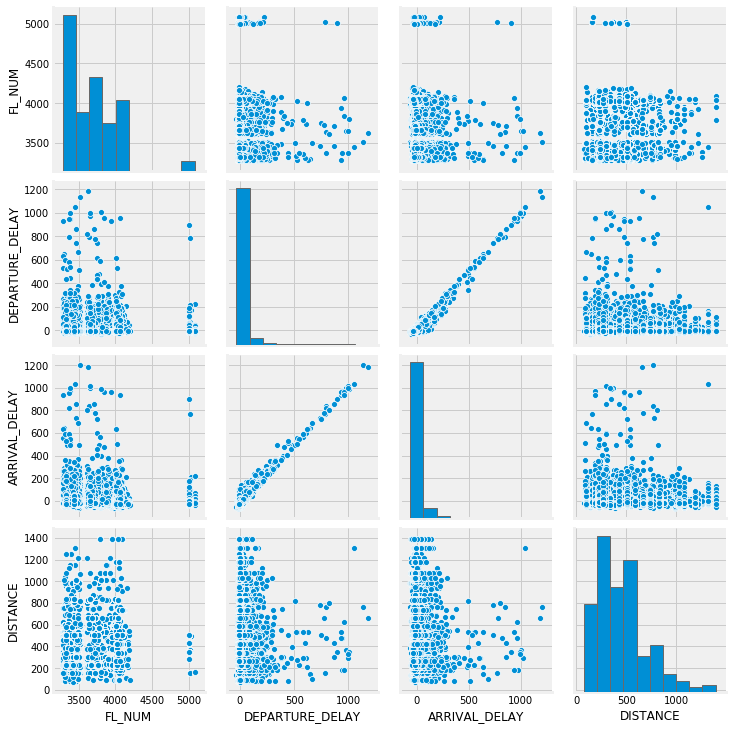

In [148]:
sns.pairplot(df)

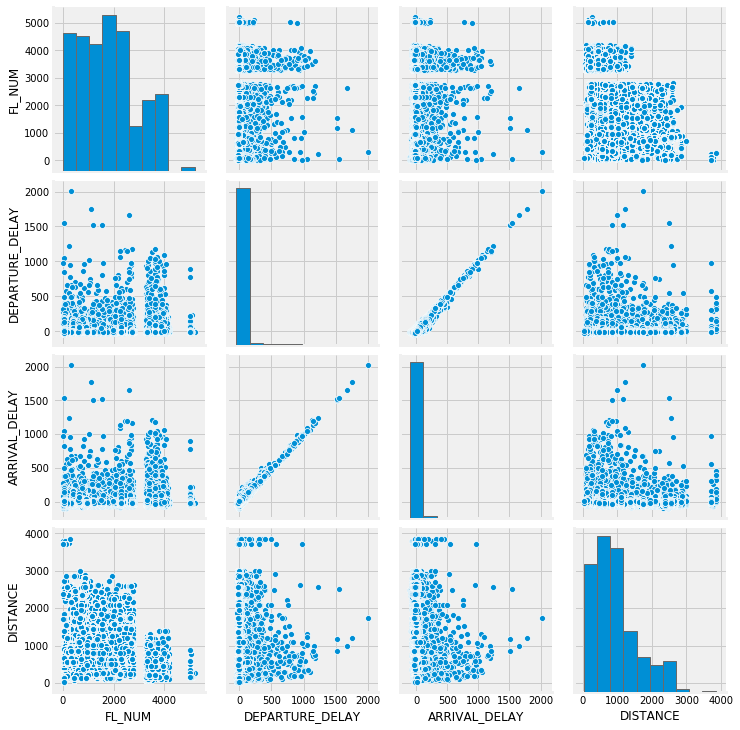

In [149]:
sns.pairplot(delaydf3)

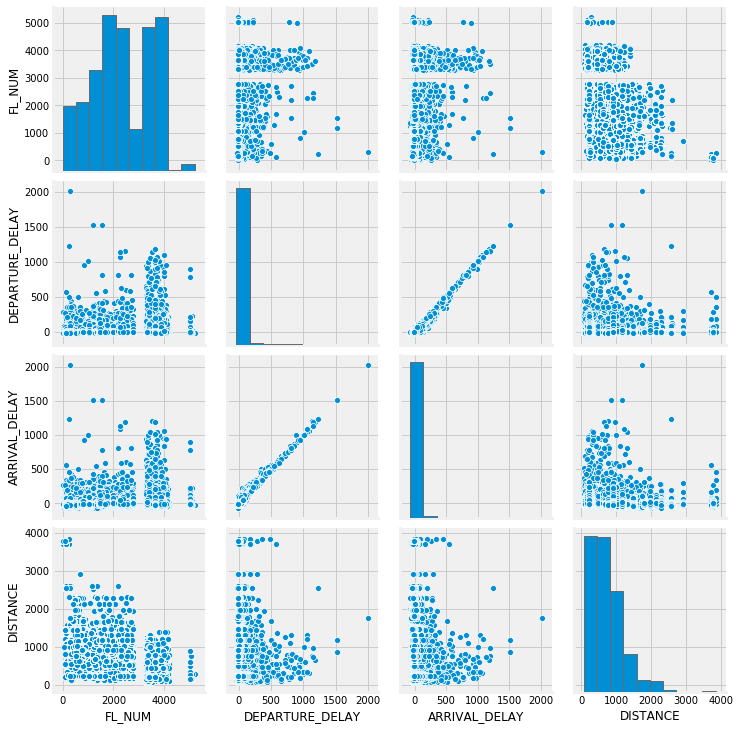

In [190]:
sns.pairplot(delaydf3)

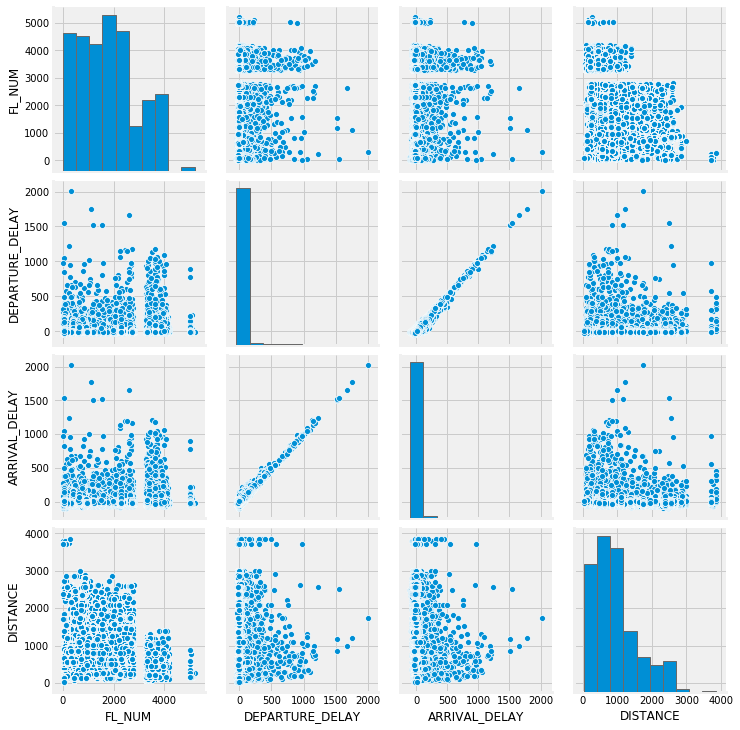

In [209]:
sns.pairplot(delaydf3)

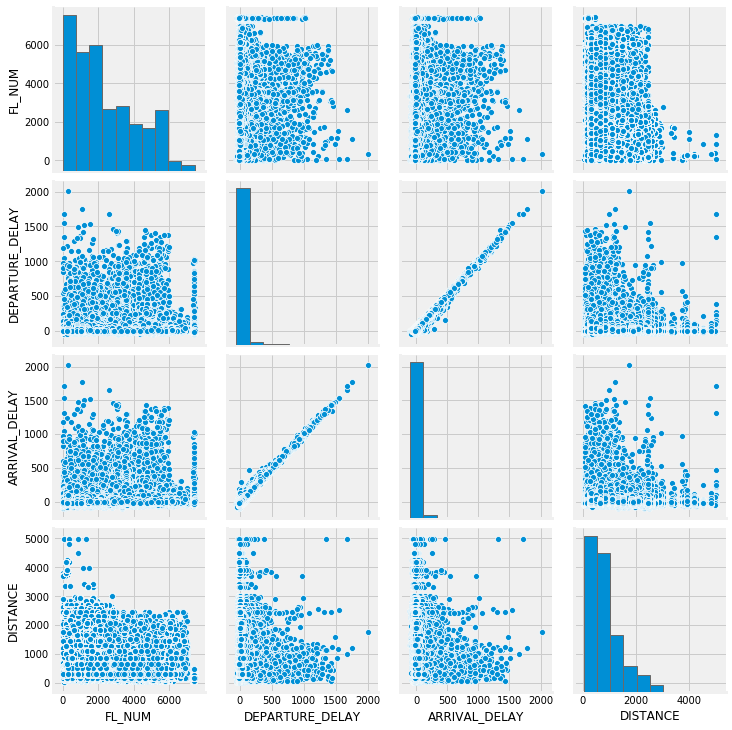

In [228]:
sns.pairplot(delaydf3)

(array([   0,    1,    2, ..., 6819, 6820, 6821]),
 <a list of 6822 Text xticklabel objects>)

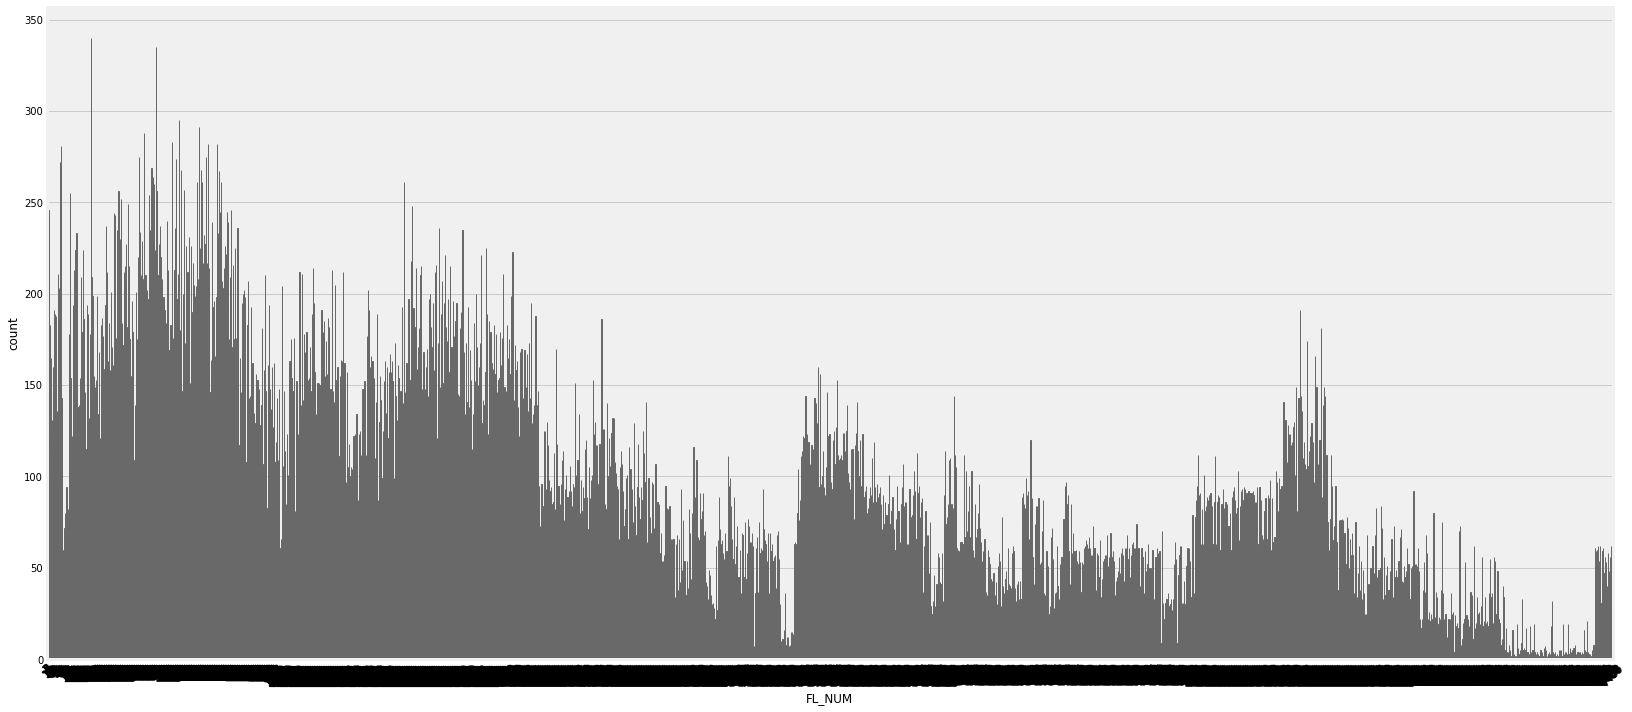

In [236]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'FL_NUM', data = delaydf3)
plt.xticks(rotation = 45)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

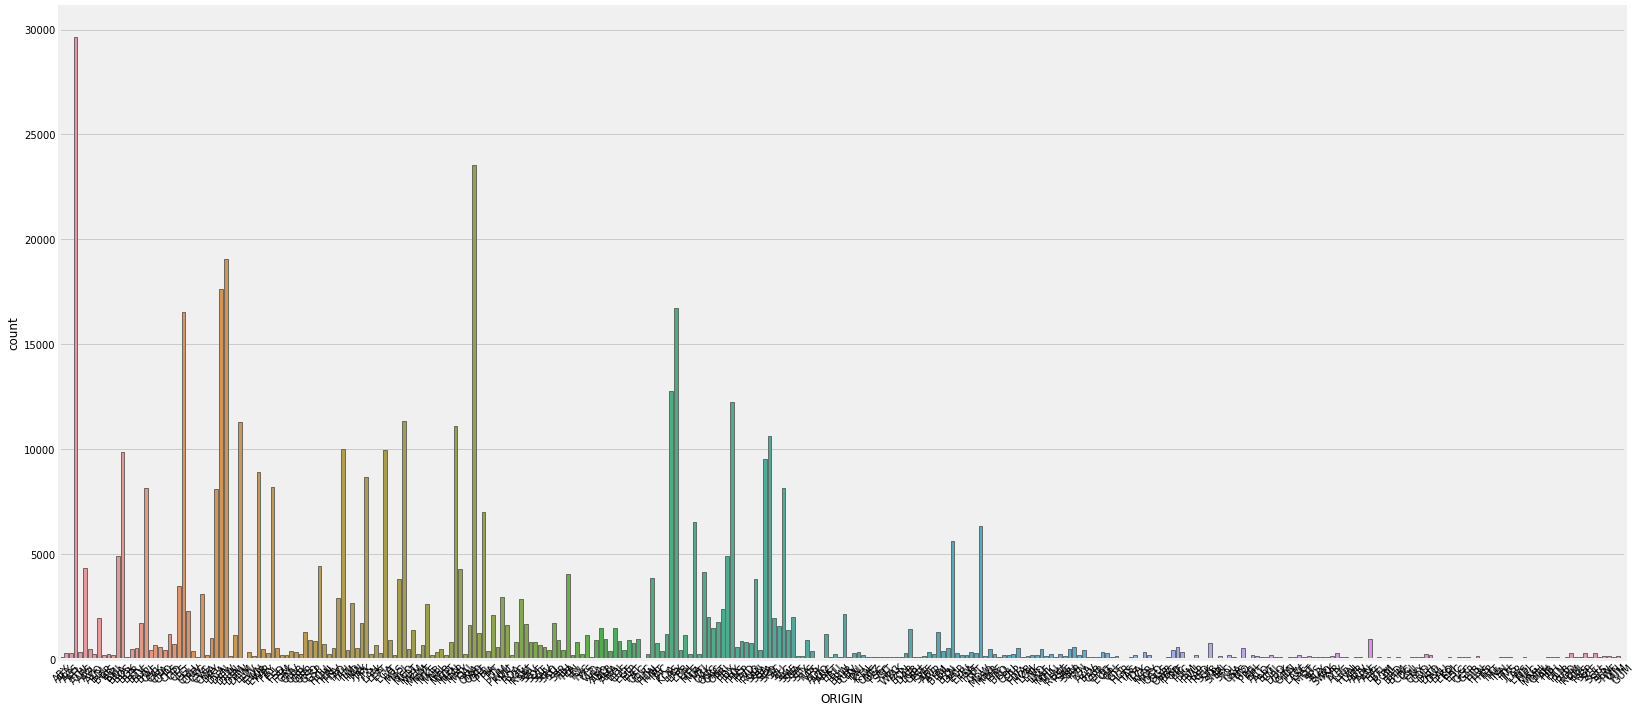

In [237]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'ORIGIN', data = delaydf3)
plt.xticks(rotation = 45)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

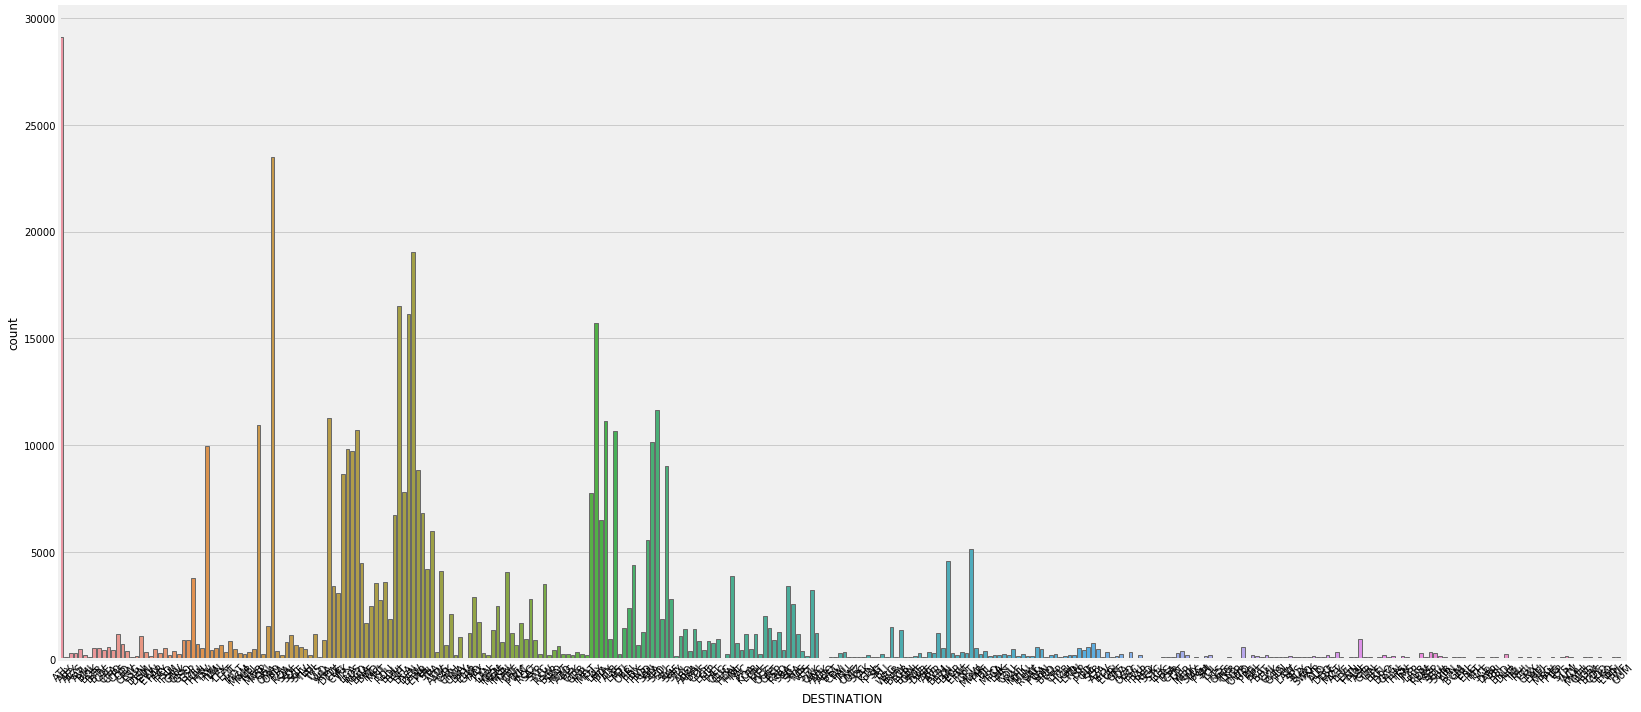

In [238]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'DESTINATION', data = delaydf3)
plt.xticks(rotation = 45)

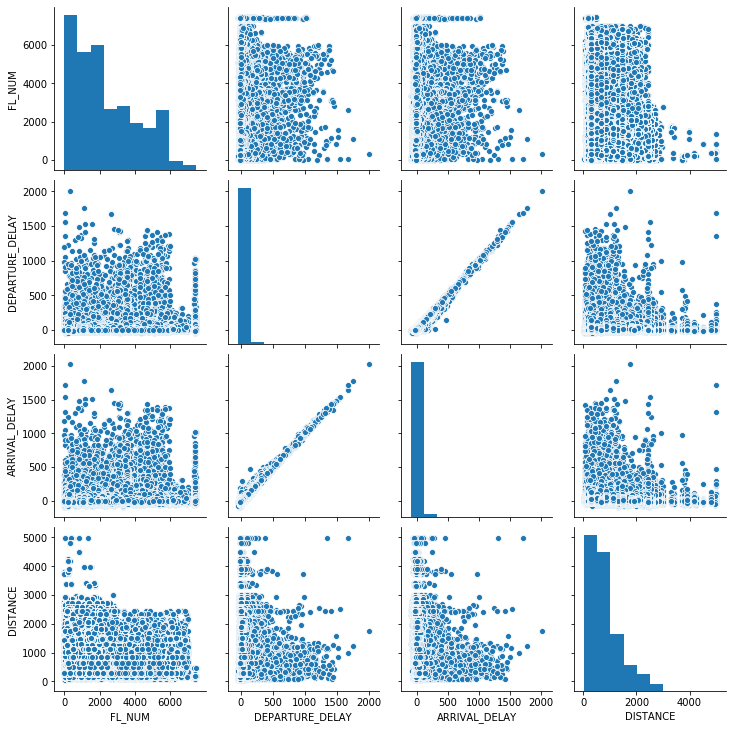

In [37]:
sns.pairplot(delaydf3)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

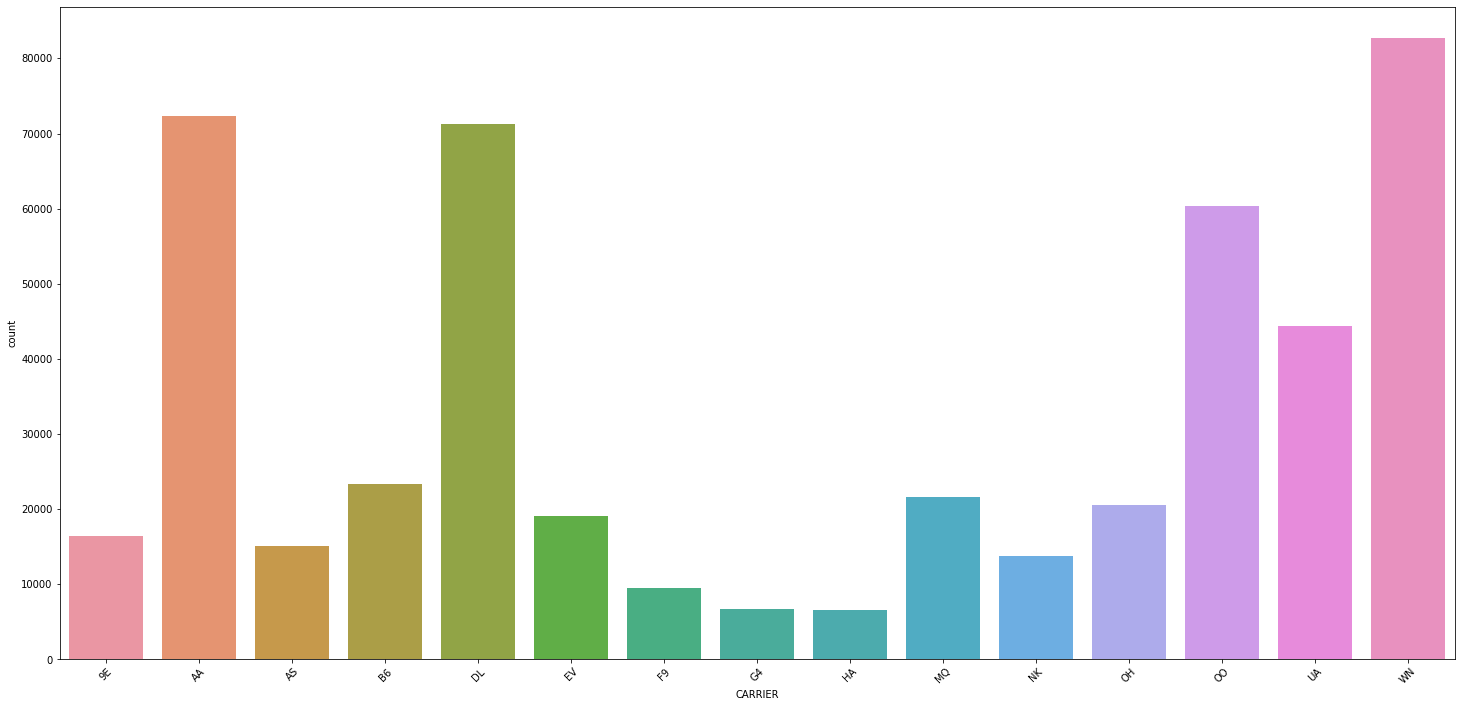

In [38]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'CARRIER', data = delaydf3)
plt.xticks(rotation = 45)

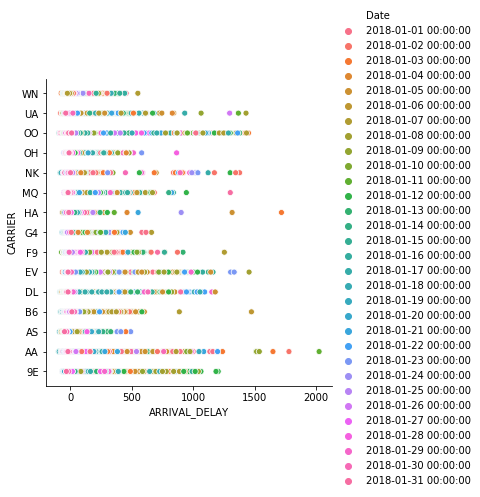

In [44]:
sns.relplot(x="ARRIVAL_DELAY", y="CARRIER", hue="Date", data=delaydf3)

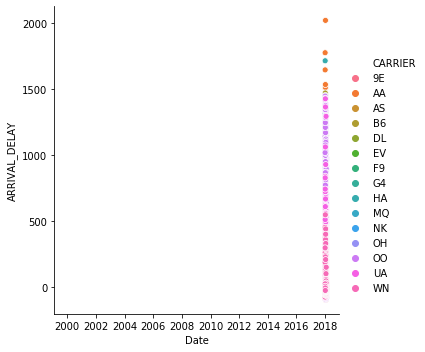

In [45]:
sns.relplot(x="Date", y="ARRIVAL_DELAY", hue="CARRIER", data=delaydf3)

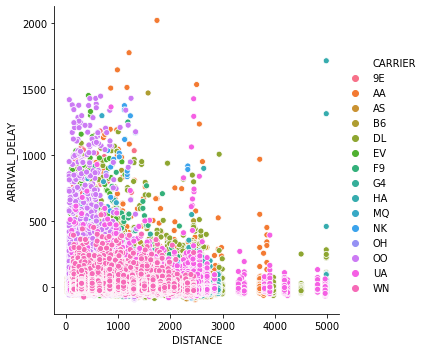

In [46]:
sns.relplot(x="DISTANCE", y="ARRIVAL_DELAY", hue="CARRIER", data=delaydf3)

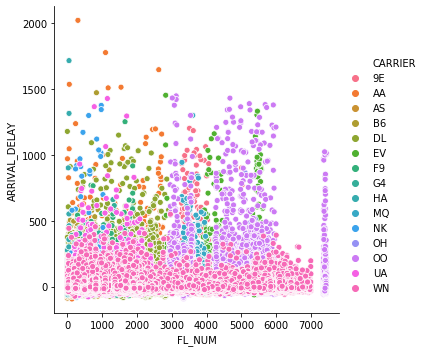

In [47]:
sns.relplot(x="FL_NUM", y="ARRIVAL_DELAY", hue="CARRIER", data=delaydf3)

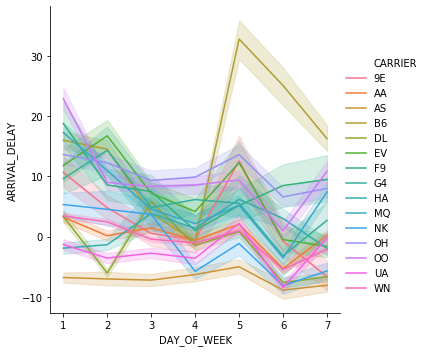

In [27]:
sns.relplot(x="DAY_OF_WEEK", y="ARRIVAL_DELAY", hue="CARRIER", kind="line", data=delaydf3)

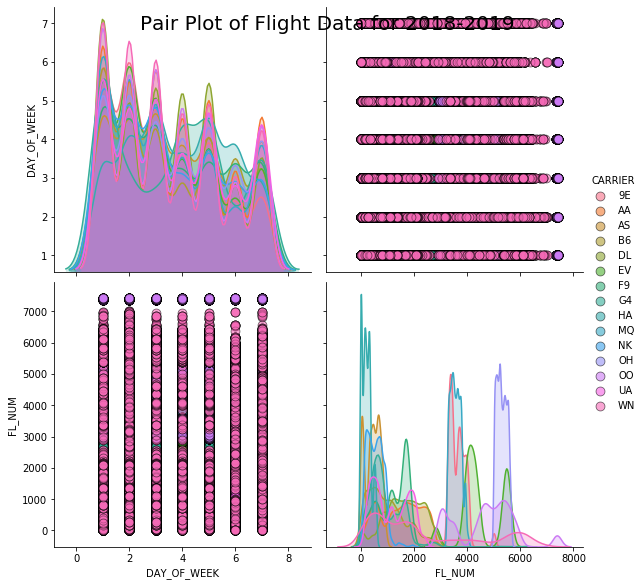

In [33]:
# Plot colored by continent for days monday to sunday
sns.pairplot(delaydf3[delaydf3['ARRIVAL_DELAY'] >= 1], 
             vars = ['DAY_OF_WEEK','FL_NUM'], hue='CARRIER',
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4);
# Title 
plt.suptitle('Pair Plot of Flight Data for 2018-2019', 
             size = 20);

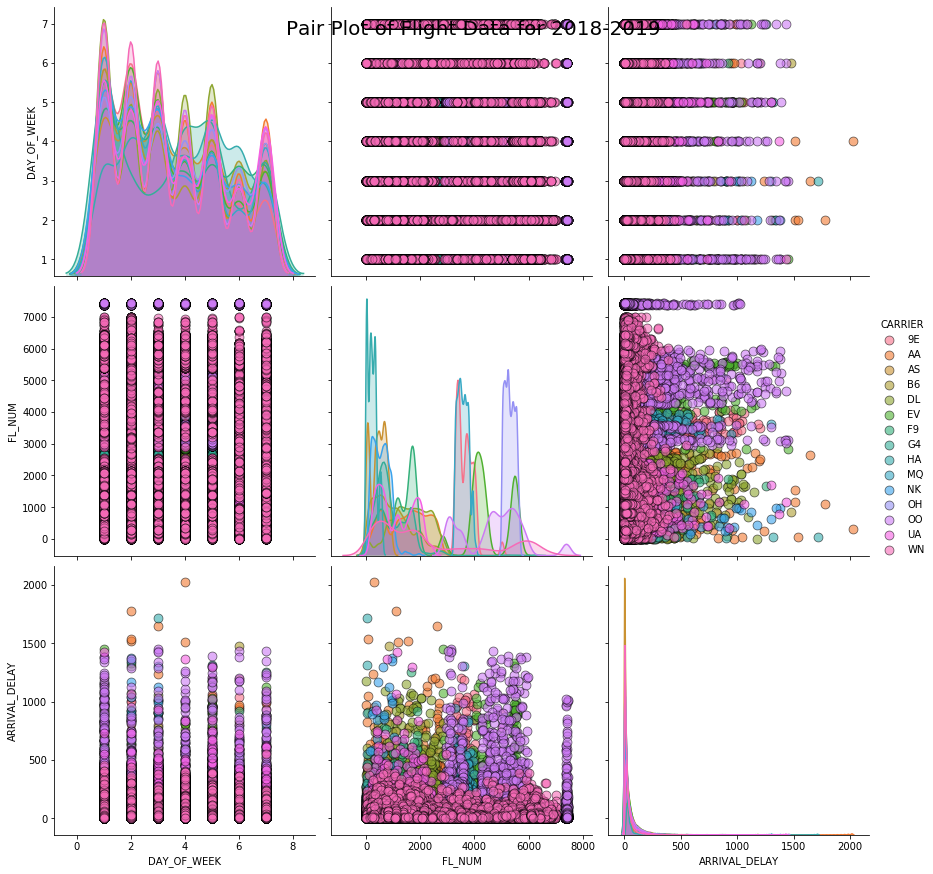

In [34]:
# Plot colored by continent for days monday to sunday
sns.pairplot(delaydf3[delaydf3['ARRIVAL_DELAY'] > 0], 
             vars = ['DAY_OF_WEEK','FL_NUM','ARRIVAL_DELAY'], hue='CARRIER',
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4)
# Title 
plt.suptitle('Pair Plot of Flight Data for 2018-2019', 
             size = 20);

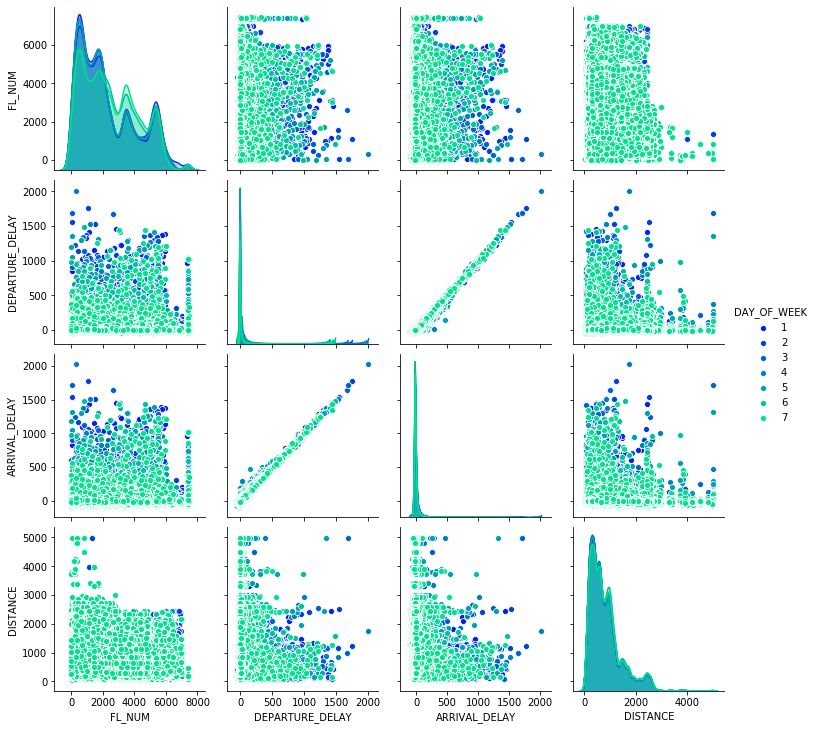

In [41]:
sns.pairplot(delaydf3, hue='DAY_OF_WEEK', palette="winter")
             

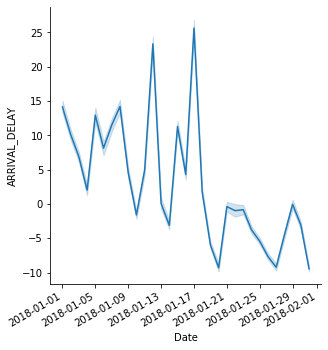

In [48]:
g = sns.relplot(x="Date", y="ARRIVAL_DELAY", kind="line", data=delaydf3)
g.fig.autofmt_xdate()

In [49]:
delaydf3.tail()

CARRIER  FL_NUM ORIGIN DESTINATION SCHEDULED_DEPARTURE  \
499995      WN    3278    PHX         SMF 2018-01-07 06:00:00   
499996      WN    4335    PHX         SMF 2018-01-07 12:15:00   
499997      WN    4037    PHX         SMF 2018-01-07 14:25:00   
499998      WN    5363    PHX         SMF 2018-01-07 17:40:00   
499999      WN    3940    PHX         SMF 2018-01-07 20:50:00   

       ACTUAL_DEPARTURE  DEPARTURE_DELAY SCHEDULED_ARRIVAL ACTUAL_ARRIVAL  \
499995         05:55:00             -5.0          07:00:00       06:53:00   
499996         12:11:00             -4.0          13:20:00       13:01:00   
499997         14:21:00             -4.0          15:25:00       15:13:00   
499998         17:44:00              4.0          18:40:00       18:36:00   
499999         20:43:00             -7.0          21:55:00       21:32:00   

        ARRIVAL_DELAY  DISTANCE       Date  
499995           -7.0       647 2018-01-07  
499996          -19.0       647 2018-01-07  
499997          -12.0       647 2018-01-07  
499998           -4.0       647 2018-01-07  
499999          -23.0       647 2018-01-07

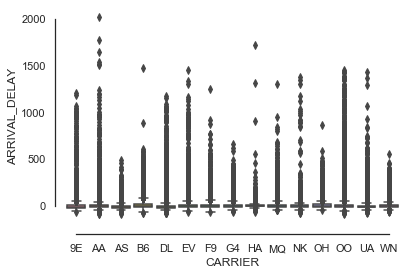

In [54]:
sns.set(style="white", color_codes=True)
sns.boxplot(x="CARRIER", y="ARRIVAL_DELAY", data=delaydf3)
sns.despine(offset=10, trim=True)

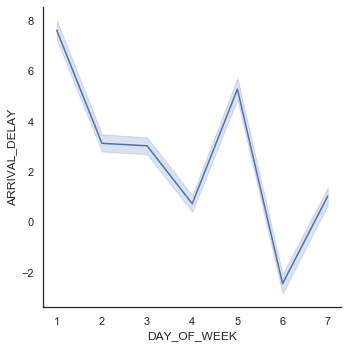

In [56]:
sns.relplot(x="DAY_OF_WEEK", y="ARRIVAL_DELAY", kind="line", data=delaydf3)


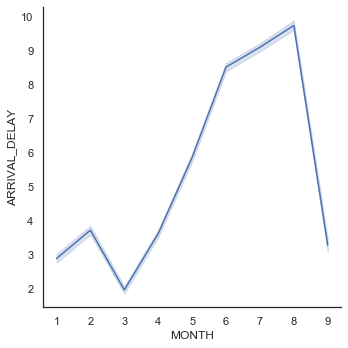

In [82]:
sns.relplot(x="MONTH", y="ARRIVAL_DELAY", kind="line", data=delaydf3)

In [60]:
sns.pairplot(delaydf3, hue = 'CARRIER', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4)

C:\Users\AB\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Error in callback <function flush_figures at 0x0000025D15BE94C8> (for post_execute):


KeyboardInterrupt: 

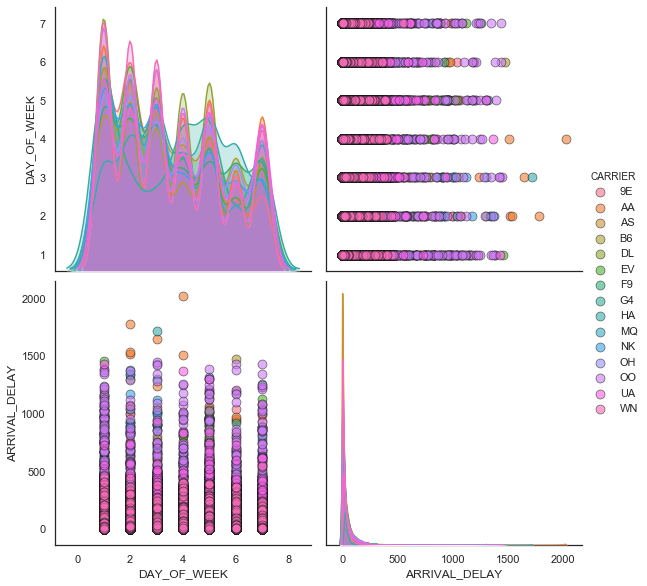

In [61]:
# Plot colored by carrier for days monday to sunday
sns.pairplot(delaydf3[delaydf3['ARRIVAL_DELAY'] > 0], 
             vars = ['DAY_OF_WEEK','ARRIVAL_DELAY'], hue='CARRIER',
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height = 4)


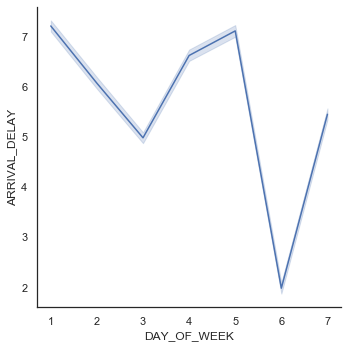

In [83]:
sns.relplot(x="DAY_OF_WEEK", y="ARRIVAL_DELAY", kind="line", data=delaydf3)

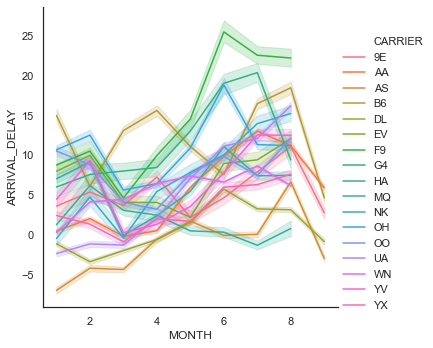

In [84]:
sns.relplot(x="MONTH", y="ARRIVAL_DELAY", hue="CARRIER", kind="line", data=delaydf3)

In [ ]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'CARRIER', data = delaydf3)
plt.xticks(rotation = 45)

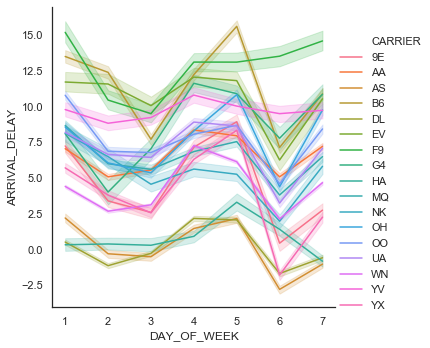

In [102]:
sns.relplot(x="DAY_OF_WEEK", y="ARRIVAL_DELAY", hue="CARRIER", kind="line", data=delaydf3)

In [104]:
delaydf3['MONTH'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

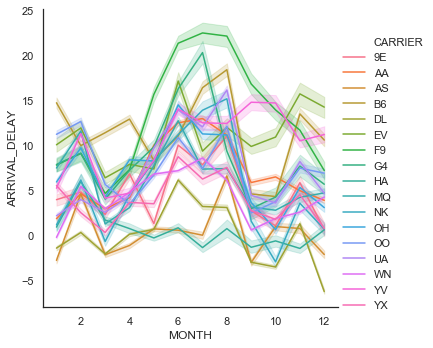

In [106]:
sns.relplot(x="MONTH", y="ARRIVAL_DELAY", hue="CARRIER", kind="line", data=delaydf3)

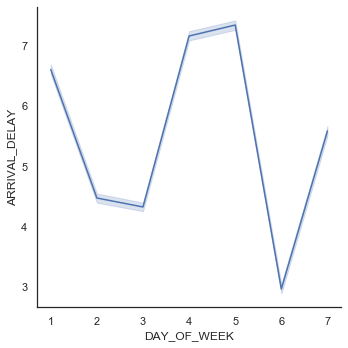

In [107]:
sns.relplot(x="DAY_OF_WEEK", y="ARRIVAL_DELAY", kind="line", data=delaydf3)

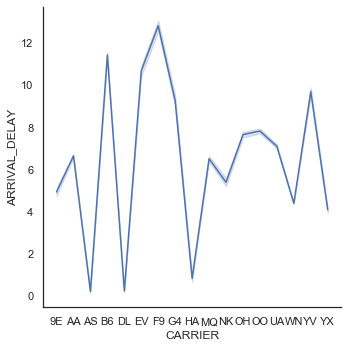

In [109]:
sns.relplot(x="CARRIER", y="ARRIVAL_DELAY", kind="line", data=delaydf3)

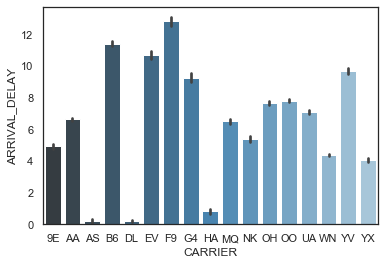

In [110]:
sns.barplot(x="CARRIER", y="ARRIVAL_DELAY", data=delaydf3, palette="Blues_d")

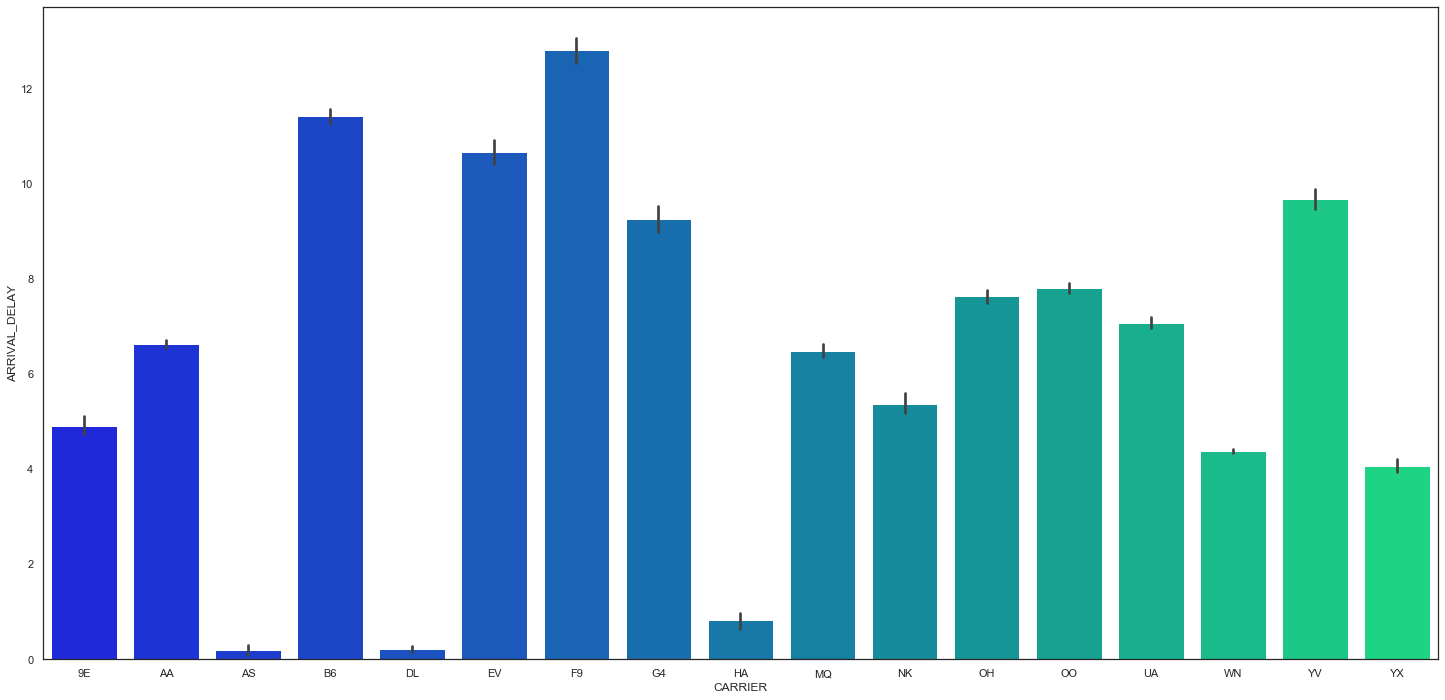

In [113]:
plt.figure(figsize=[25,12])
sns.barplot(x="CARRIER", y="ARRIVAL_DELAY", data=delaydf3, palette="winter")